# TASK #1 UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


In [10]:
from google.colab import files
uploaded = files.upload()

Saving happiness_report.csv to happiness_report.csv


# TASK #2: IMPORT DATASETS AND LIBRARIES

In [3]:
# Get the required dependencies
! pip install bubbly
! pip install iplot
! pip install chart_studio

  Preparing metadata (setup.py) ... done
  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5415 sha256=78100c08a10a8270f4b51c21050ef5ef34125b3855e176e2d80a5d7426e3bbed
  Stored in directory: /root/.cache/pip/wheels/dc/b4/ab/043c77f064dbbb38983593a3bed54363cc1910d0fb20ba6f66
Successfully built bubbly
ERROR: Could not find a version that satisfies the requirement iplot (from versions: none)
ERROR: No matching distribution found for iplot
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [7]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


In [6]:
pip install jupyterthemes


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00


In [11]:
# Import csv file into pandas dataframe
happy_df = pd.read_csv('happiness_report.csv')

In [13]:
# print the first 5 rows of the dataframe
happy_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


MINI CHALLENGE #1:
- Find out how many samples exist in the DataFrame using two different methods.
- Select your own country from the dataframe and explore scores. Perform sanity check.

In [14]:
len(happy_df)

156

In [15]:
happy_df.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [16]:
happy_df[ happy_df['Country or region'] == 'Canada' ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [17]:
# Check the number of non-null values in the dataframe
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [18]:
# Check Null values
happy_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [19]:
# Obtain the Statistical summary of the dataframe
happy_df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [20]:
# check the number of duplicated entries in the dataframe
 # since there are no duplicates, no further action is required
happy_df.duplicated().sum()

0

MINI CHALLENGE #2:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [21]:
happy_df [ happy_df['Score'] == 7.69000]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


# TASK #4: PERFORM DATA VISUALIZATION - PART #1

<Figure size 2000x2000 with 0 Axes>

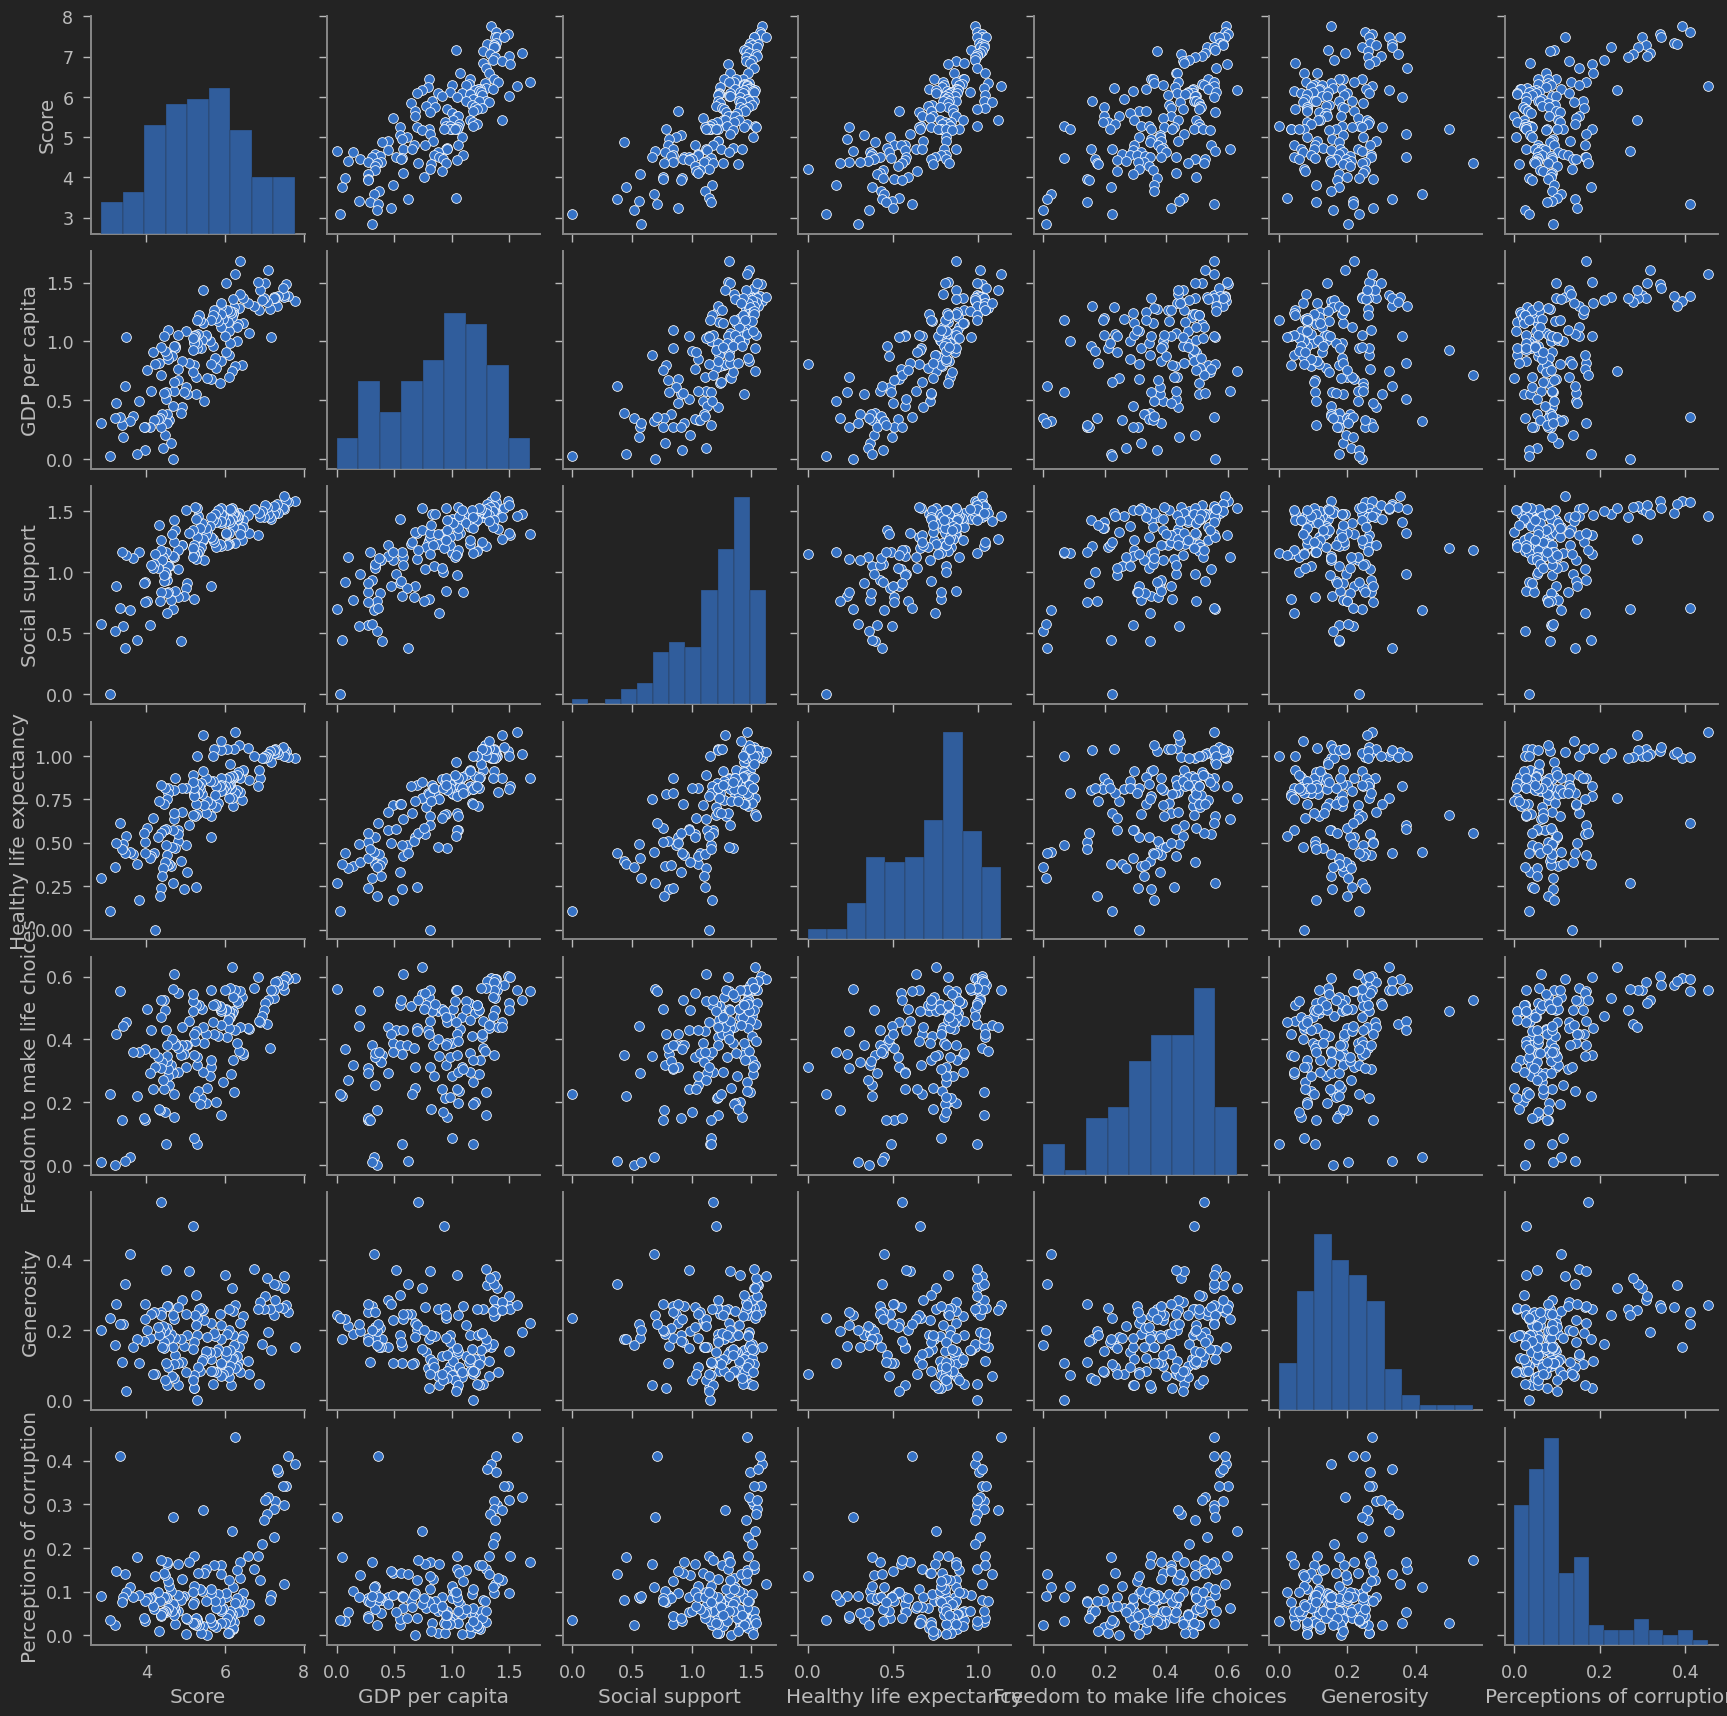

In [26]:
# Plot the pairplot
fig = plt.figure(figsize = (20,20))

# Positive correlation between GDP and score
# Positive correlation between Social Support and score
sns.pairplot(happy_df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])

<ipython-input-27-a90ea8a8f6c4>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-a90ea8a8f6c4>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-27-a90ea8a8f6c4>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

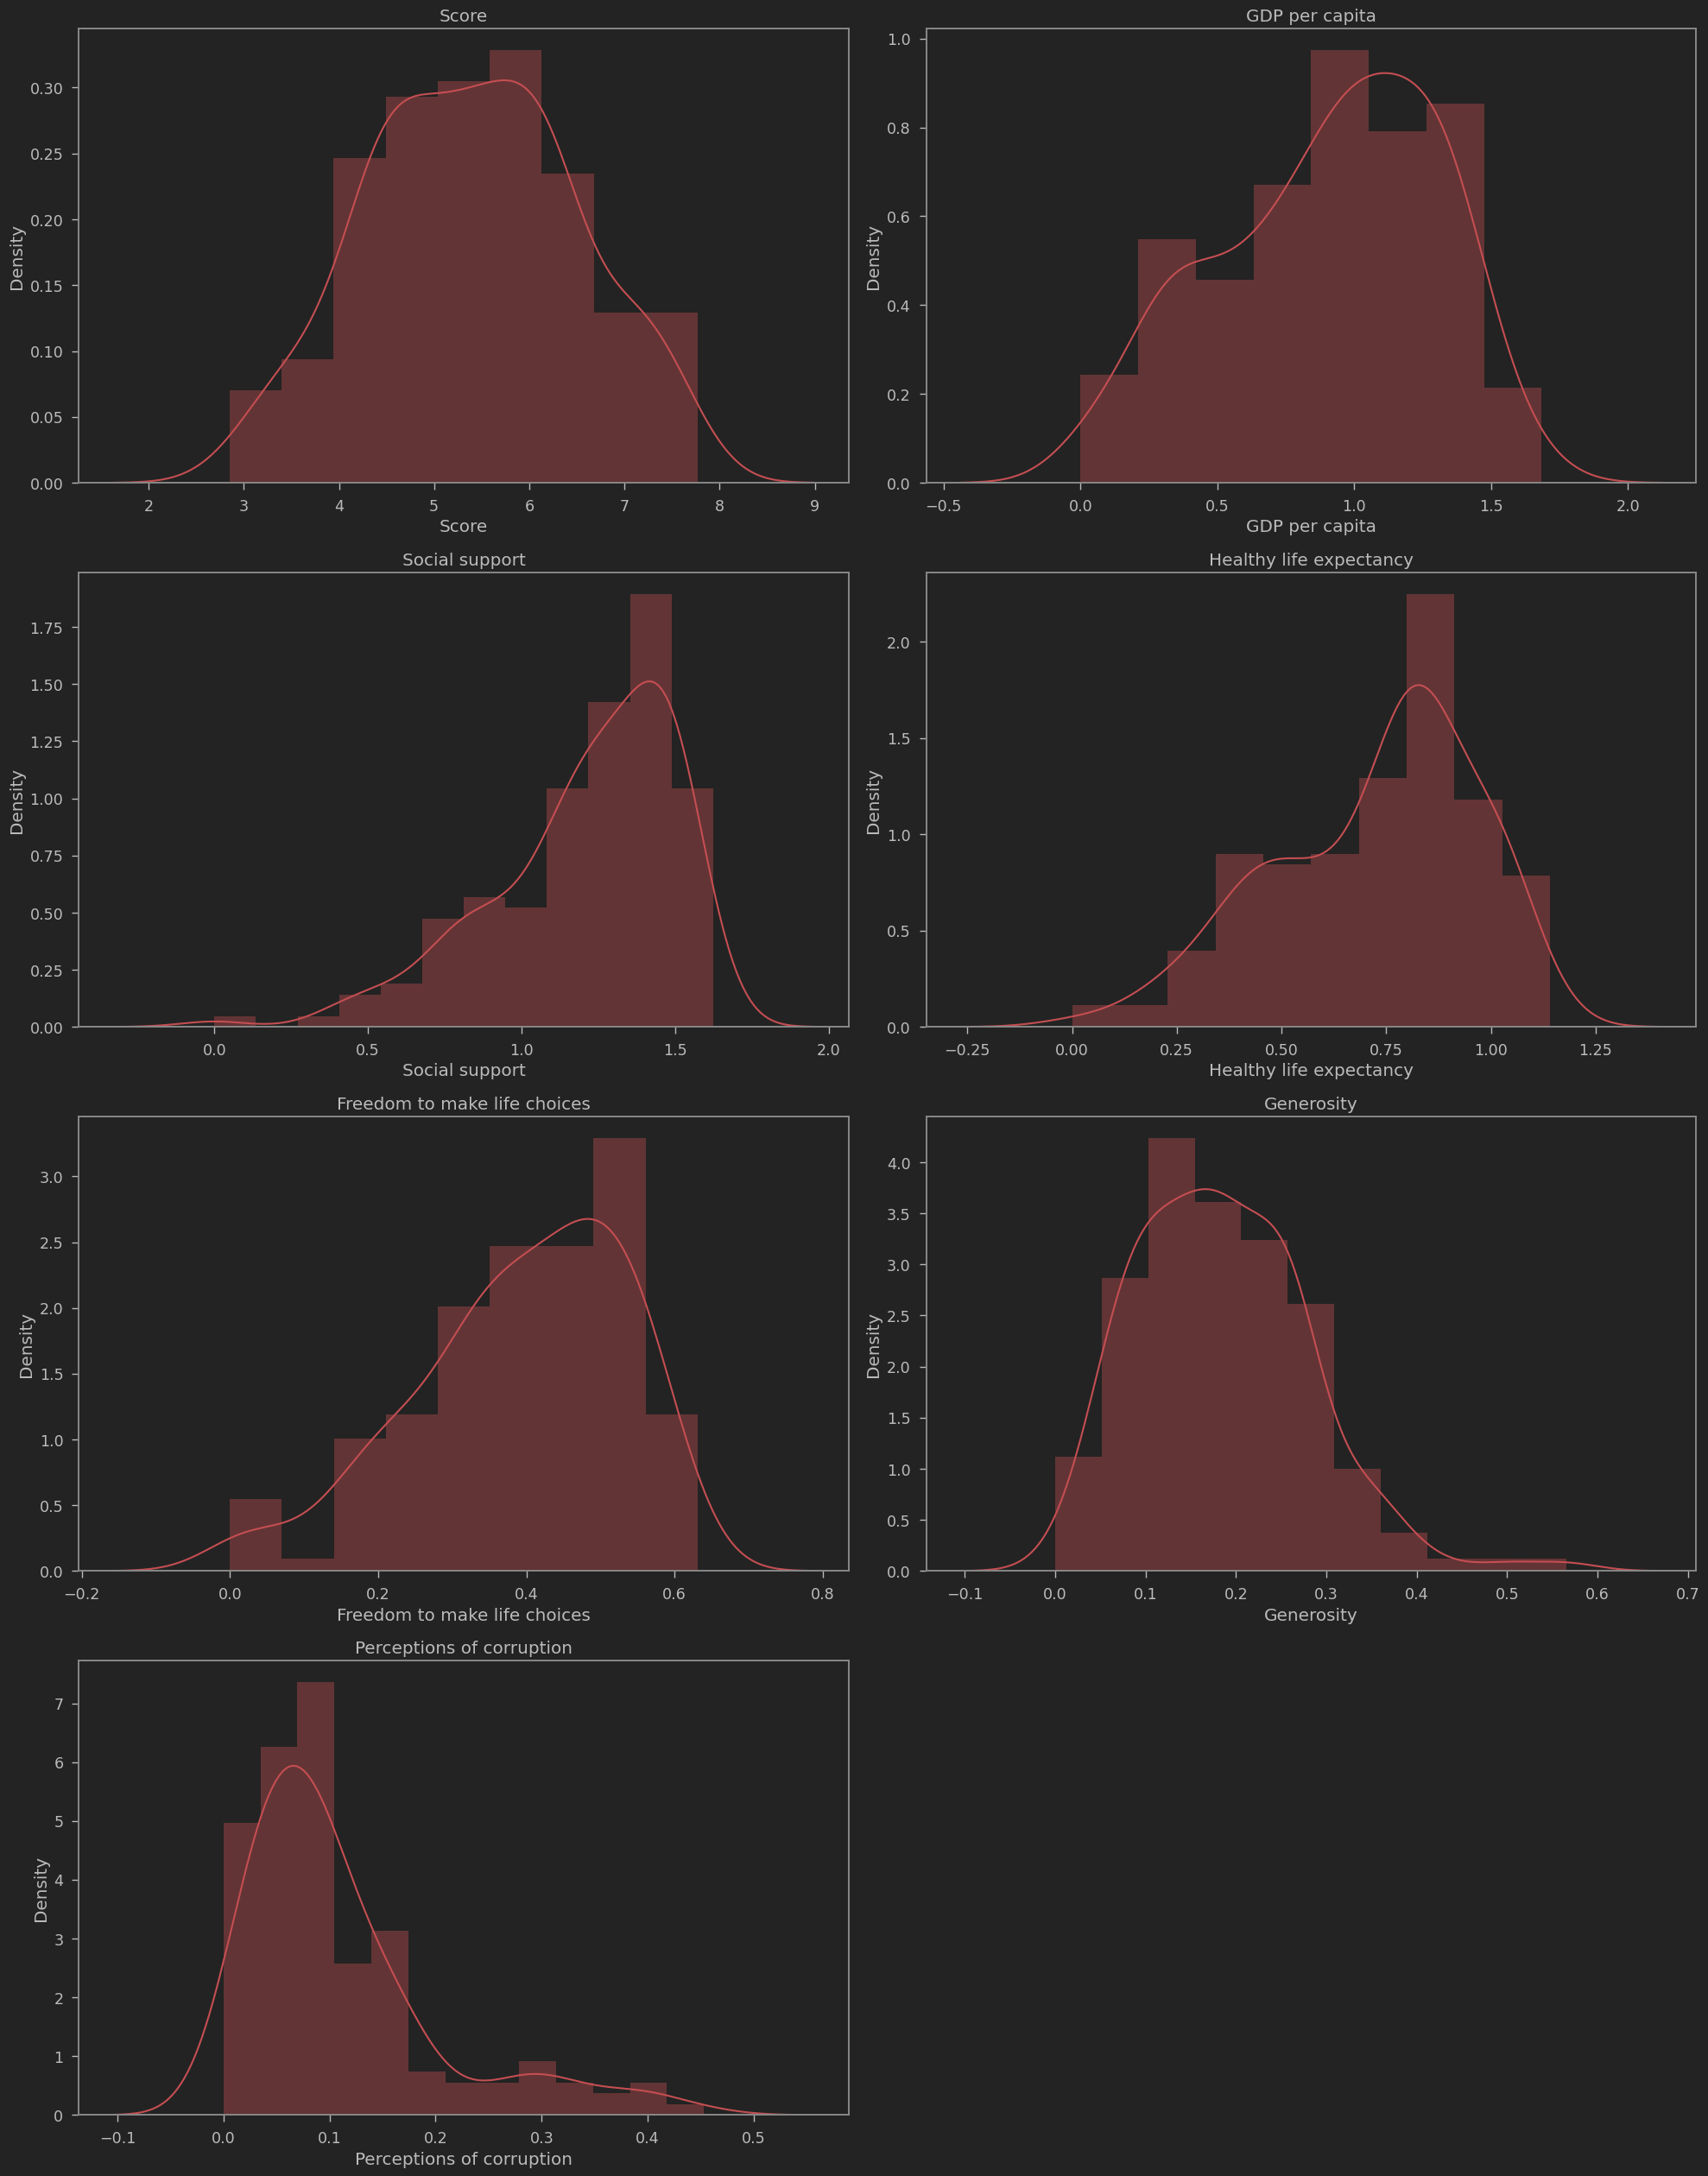

In [27]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy',
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(happy_df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

MINI CHALLENGE #3:
- Plot the correlation matrix and comment on the results.


In [28]:
corr_matrix = happy_df.corr()
corr_matrix

<ipython-input-28-6b030f47d315>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


<Axes: >

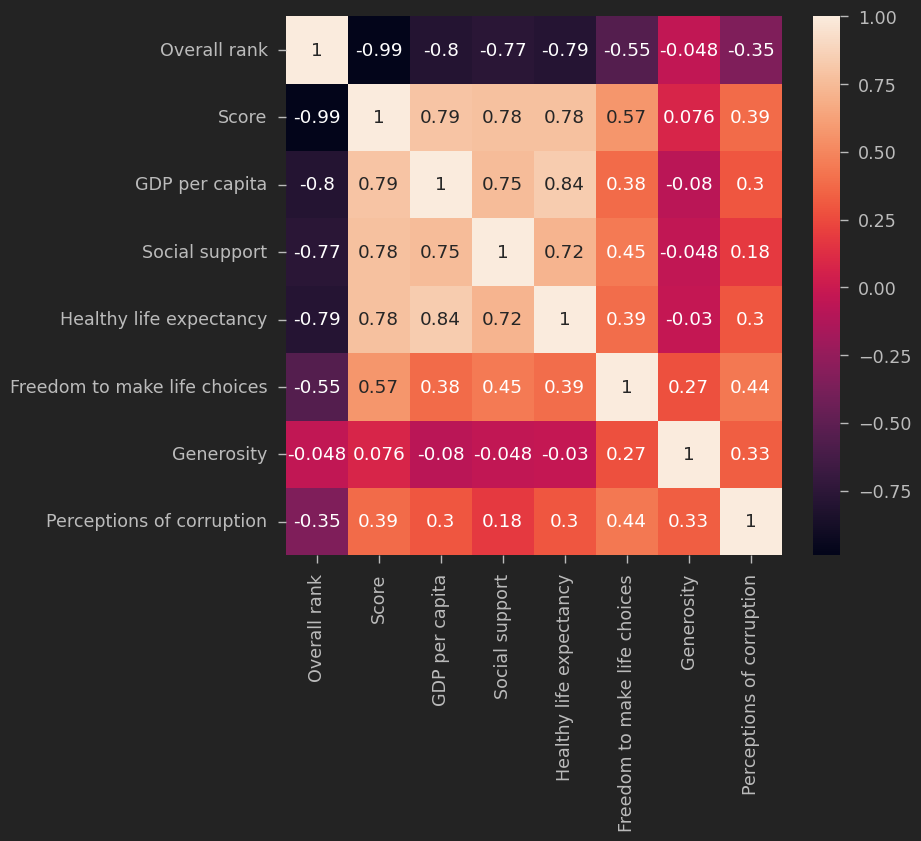

In [29]:
sns.heatmap(corr_matrix, annot = True)

# TASK #5: PERFORM DATA VISUALIZATION - PART #2

In [31]:
# Plot the relationship between score, GDP and region
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region')
fig.show()

In [32]:
# Plot the relationship between score and GDP (while adding color and size)
fig = px.scatter(happy_df, x = 'GDP per capita', y = 'Score', text = 'Country or region', size = 'Overall rank', color = 'Country or region')
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [33]:
# Plot the relationship between score and freedom to make life choices

fig = px.scatter(happy_df, x = 'Freedom to make life choices', y = "Score", size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

MINI CHALLENGE #4:
- Plot a similar type of plots for 'Healthy life expectancy' and 'Score'

# TASK #6: PREPARE THE DATA TO FEED THE CLUSTERING MODEL

In [ ]:
# We are going to create clusters without the use of happiness score and rank to see which countries fall under similar clusters

In [34]:
# Select the data without rank and happiness score
df_seg = happy_df.drop(columns = ['Overall rank', 'Country or region', 'Score'])
df_seg

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...
151,0.359,0.711,0.614,0.555,0.217,0.411
152,0.476,0.885,0.499,0.417,0.276,0.147
153,0.350,0.517,0.361,0.000,0.158,0.025
154,0.026,0.000,0.105,0.225,0.235,0.035


In [35]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_seg)

In [36]:
scaled_data.shape

(156, 6)

# TASK #8: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

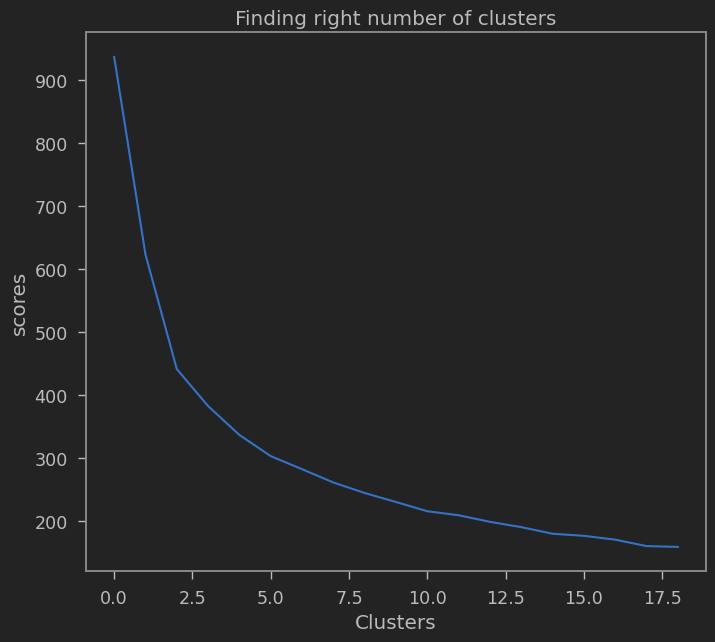

In [37]:
scores = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_data)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [ ]:
# From this we can observe that 3rd cluster seems to be forming the elbow of the curve.
# Let's choose the number of clusters to be 3.

# TASK #9: APPLY K-MEANS METHOD

In [39]:
Kmeans = KMeans(3)
kmeans.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=19)

In [40]:
kmeans.labels_

array([ 5,  5,  5, 16,  3,  5,  5,  5,  3,  3,  3,  8, 15,  5,  3,  3,  3,
       18, 16,  8, 16, 16,  8, 18, 15, 15,  1, 18, 16, 15,  8,  8, 18,  5,
       13, 14, 16, 14,  8,  8, 16, 14,  8,  8,  1, 10,  8,  8, 15,  1, 18,
       10, 14, 14, 18,  8,  1, 18, 10,  8,  1, 14,  1, 15,  8,  8,  4, 14,
        1, 14, 12, 13, 14,  4, 14,  3,  8, 12, 14, 10, 14, 14, 12, 12, 11,
       10, 12,  0,  0, 13, 12,  2,  8,  1,  2, 11, 14,  4, 11,  4, 13,  9,
       11,  0,  4, 13,  0, 14, 10,  0,  7, 17, 13,  9,  7,  0, 10,  9,  0,
        4,  2,  7,  4,  0,  4,  0,  7, 11,  9, 10,  2,  9, 12,  4, 11,  4,
        0,  4,  9,  4,  9,  6,  7, 11,  9, 11,  6, 13,  6,  9,  7, 17,  4,
        6,  9,  6], dtype=int32)

In [41]:
kmeans.cluster_centers_.shape

(19, 6)

In [43]:
kmeans.cluster_centers_

array([[ 0.00642784, -0.71358834,  0.01307832, -0.86866185, -1.04736778,
        -0.34915683],
       [-0.16877527,  0.40257697,  0.22584277,  0.8326677 , -0.23403339,
        -0.2769963 ],
       [-0.41209544, -0.12344161, -0.51893638,  0.58411956,  2.8084007 ,
        -0.05945353],
       [ 1.23102395,  0.92272761,  1.23890816,  0.86679931,  1.14434328,
         1.82680148],
       [-1.01210279, -0.75924218, -0.77519077,  0.22328043,  0.53389184,
         0.01972714],
       [ 1.35126755,  1.08283845,  1.26791207,  1.28075449,  0.68751739,
         2.81768227],
       [-1.33652323, -2.09842131, -1.30618556, -2.48107418,  0.97056513,
        -0.22924301],
       [-1.43741873, -0.38666046, -1.0610334 , -1.37976085, -0.32311663,
        -0.38842065],
       [ 0.48904649,  0.6530984 ,  0.56273911,  0.6178908 , -0.88120985,
        -0.59254256],
       [-1.740441  , -1.99179253, -1.59415302, -0.62501466,  0.2217393 ,
        -0.30883183],
       [-0.08567498,  0.01864628,  0.21548423,  0.

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
cluster_centers

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.006428,-0.713588,0.013078,-0.868662,-1.047368,-0.349157
1,-0.168775,0.402577,0.225843,0.832668,-0.234033,-0.276996
2,-0.412095,-0.123442,-0.518936,0.584120,2.808401,-0.059454
3,1.231024,0.922728,1.238908,0.866799,1.144343,1.826801
4,-1.012103,-0.759242,-0.775191,0.223280,0.533892,0.019727
5,1.351268,1.082838,1.267912,1.280754,0.687517,2.817682
6,-1.336523,-2.098421,-1.306186,-2.481074,0.970565,-0.229243
7,-1.437419,-0.386660,-1.061033,-1.379761,-0.323117,-0.388421
8,0.489046,0.653098,0.562739,0.617891,-0.881210,-0.592543
9,-1.740441,-1.991793,-1.594153,-0.625015,0.221739,-0.308832


In [45]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_seg.columns])
cluster_centers


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.907700,0.996000,0.728400,0.268500,0.085400,0.077700
1,0.838125,1.328875,0.779750,0.511500,0.162625,0.084500
2,0.741500,1.172000,0.600000,0.476000,0.451500,0.105000
3,1.394000,1.484000,1.024250,0.516375,0.293500,0.282750
4,0.503231,0.982385,0.538154,0.424462,0.235538,0.112462
5,1.441750,1.531750,1.031250,0.575500,0.250125,0.376125
6,0.374400,0.583000,0.410000,0.038200,0.277000,0.089000
7,0.334333,1.093500,0.469167,0.195500,0.154167,0.074000
8,1.099353,1.403588,0.861059,0.480824,0.101176,0.054765
9,0.214000,0.614800,0.340500,0.303300,0.205900,0.081500


- Cluster 0: countries that have GDP in the range of 0.6 to 1.4 and have high social support. These countries have medium life expectancy and have high freedom to make life choices. These counties have low generosity and low perception of corruption.

- Cluster 1: countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

- Cluster 2: countries that have low GDP average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

In [48]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([ 2,  2,  2, 17,  2,  2,  2,  2,  2,  2,  2, 18,  4,  2,  2,  2,  2,
       15, 17, 18, 17, 17, 18, 15,  4,  4,  1, 15, 17,  4, 18, 18, 15,  2,
        9,  4, 17, 10,  7, 18,  6, 10, 18, 18,  1,  7, 18, 18,  4, 18, 15,
       17, 10,  4, 15, 18,  7, 15,  1, 18,  9, 10,  7, 15, 18, 18, 12, 10,
        9, 10, 14,  9, 10,  1, 10,  2, 18, 14, 10,  7, 10,  0,  7, 14,  3,
        1,  7,  0,  5,  9, 14,  6, 18, 18,  6,  3, 10, 12,  3,  1,  9, 11,
        5,  0,  1,  9,  5, 10,  1,  0,  3, 13,  9, 11,  3,  0, 12,  3,  5,
       12, 12,  0,  3,  0,  1,  0,  3,  3,  3,  7,  6,  8, 14,  3,  3,  3,
        0, 12, 11, 12,  3,  8,  8,  3, 11,  3, 16,  9, 16, 11,  3, 13, 12,
        8, 11,  8], dtype=int32)

In [49]:
# concatenate the clusters labels to our original dataframe
happy_df_cluster = pd.concat([happy_df, pd.DataFrame({'cluster':labels})], axis = 1)
happy_df_cluster

NameError: ignored

NameError: ignored

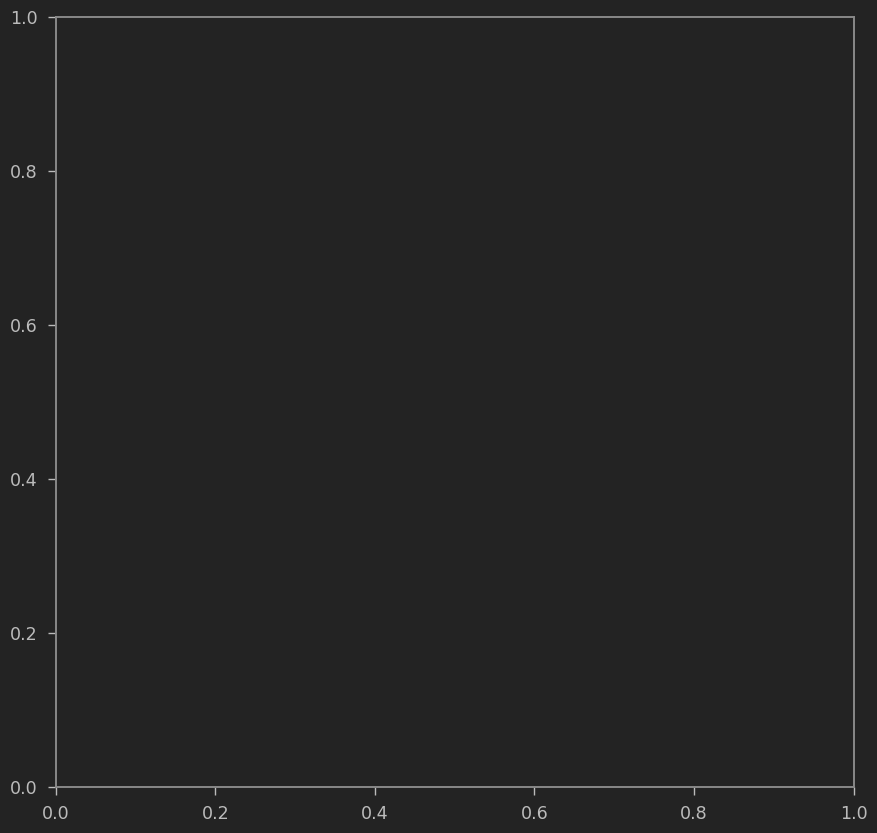

In [51]:
# Plot the histogram of various clusters
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = happy_df_cluster[happy_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i, j))

  plt.show()



MINI CHALLENGE #5:
- Try the same model with 4 clusters

# TASK #10: VISUALIZE THE CLUSTERS

In [ ]:
# Plot the relationship between cluster and score

fig = px.scatter(happy_df_cluster, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [ ]:
# Plot the relationship between cluster and GDP

fig = px.scatter(happy_df_cluster, x='cluster', y='GDP per capita',
           size='Overall rank', color="Country or region", hover_name="Country or region",
          trendline= "ols")

fig.update_layout(
    title_text='GDP vs Clusters'
)
fig.show()

In [ ]:
# Visaulizing the clusters with respect to economy, corruption, gdp, rank and their scores

from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster,
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',
    color_column='cluster', z_column='Healthy life expectancy', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Life expectancy on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})

MINI CHALLENGE #6:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [ ]:
# Visualizing the clusters geographically
data = dict(type = 'choropleth',
           locations = happy_df_cluster["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happy_df_cluster['cluster'],
           text = happy_df_cluster["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Geographical Visualization of Clusters',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# GREAT JOB!

MINI CHALLENGE #1 SOLUTION:
- Find out how many samples exist in the DataFrame using two different methods
- Select your own country from the dataframe and explore scores. Perform sanity check.

In [ ]:
len(happy_df)

In [ ]:
happy_df

In [ ]:
happy_df[happy_df['Country or region']=='Canada']

MINI CHALLENGE #2 SOLUTION:
- What is the country that has the maximum happiness score? What is the perception of corruption in this country?

In [ ]:
happy_df[happy_df['Score'] == 7.769000]

MINI CHALLENGE #3 SOLUTION:
- Plot the correlation matrix and comment on the results.

In [ ]:
# Get the correlation matrix
corr_matrix = happy_df.corr()
corr_matrix
sns.heatmap(corr_matrix, annot = True)

MINI CHALLENGE #4 SOLUTION:
- Plot the similar type of plot for 'Healthy life expectancy' and 'Score'

In [ ]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score", text = 'Country or region')
fig.update_traces(textposition = 'top center')
fig.update_layout(height = 1000)
fig.show()

In [ ]:
# Plot the relationship between score and healthy life expectancy
fig = px.scatter(happy_df, x = 'Healthy life expectancy', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Healthy life expectancy'
)
fig.show()

MINI CHALLENGE #5 SOLUTION:
- Try the same model with 4 clusters

In [ ]:
kmeans = KMeans(4)
kmeans.fit(scaled_data)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_data)

MINI CHALLENGE #6 SOLUTION:
- Plot the similar type of visualization having 'Generosity' instead of 'Healthy life expectancy'

In [ ]:
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=happy_df_cluster,
    x_column='GDP per capita', y_column='Perceptions of corruption', bubble_column='Country or region',
    color_column='cluster', z_column='Generosity', size_column='Score',
    x_title="GDP per capita", y_title="Corruption", z_title="Life Expectancy",
    title='Clusters based Impact of Economy, Corruption and Generosity on Happiness Scores of Nations',
    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
    scale_bubble=0.8, height=650)

iplot(figure, config={'scrollzoom': True})